Libraries/module Imports

In [ ]:
#   Custom imports for testing
from classification.knn import KNN
from featextr.feature_extraction import extract_features
from utils.import_data import import_all_data, import_panda_csv
from utils.constants import BAND_NAMES
from utils.plot_fig import (
    plot_avg_roc_curve,
)

%load_ext autoreload
%autoreload 2

In [ ]:
#   Python imports
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
#   Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")

In [ ]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=RuntimeWarning, module="scipy.stats")

Import data

In [ ]:
labels = [c.strip() for c in import_panda_csv("../data/mTBI/sources_TBI_MEGM001.csv").columns]
graphs, targets = import_all_data("../graphs/full_multilayer/AEC")
graphs = [graph.to_numpy() for graph in graphs]

In [ ]:
total_labels = ["{}_{}".format(band, label) for band in BAND_NAMES for label in labels]

Feature Extraction

In [ ]:
dataset = extract_features(graphs, targets, mode="NS")

X = dataset.drop("label", axis=1)
y = dataset["label"]

In [57]:
dataset_1 = extract_features(graphs, targets, mode="BC")

X_1 = dataset_1.drop("label", axis=1)
y_1 = dataset_1["label"]

Extraction Complete [████████████████████] 60/60


In [58]:
dataset_2 = extract_features(graphs, targets, mode="FE")

X_2 = dataset_2.drop("label", axis=1)
y_2 = dataset_2["label"]

Extraction Complete [████████████████████] 60/60


k-NN Classifier

We build the k-NN Classifier and we check statistics

In [59]:
knn_classifier = KNN()
knn_classifier_1 = KNN()
knn_classifier_2 = KNN()

Choose Best k value based on cross-validated accuracy

s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Optimal value of k: 26


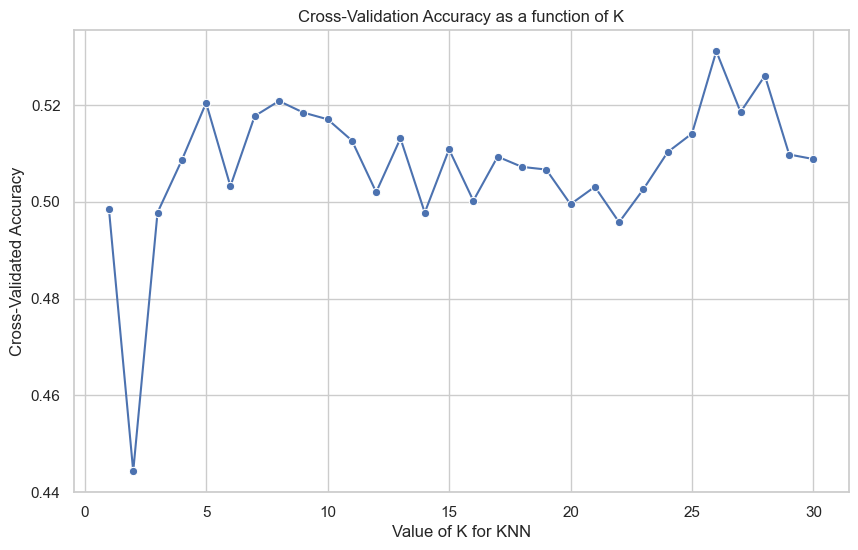

In [60]:
knn_classifier.find_best_k(X, y, range(1, 31))

s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Optimal value of k: 1


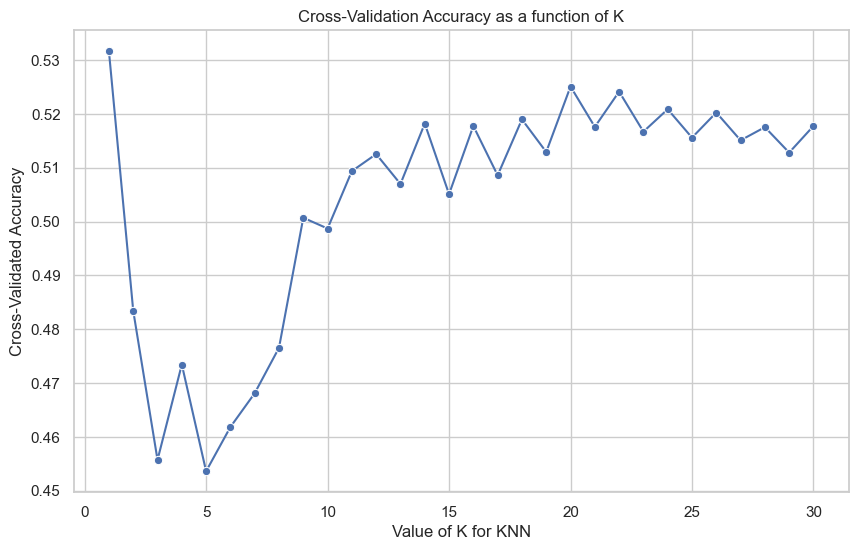

In [61]:
knn_classifier_1.find_best_k(X_1, y_1, range(1, 31))

s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
s:\Program Files (x86)\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Optimal value of k: 10


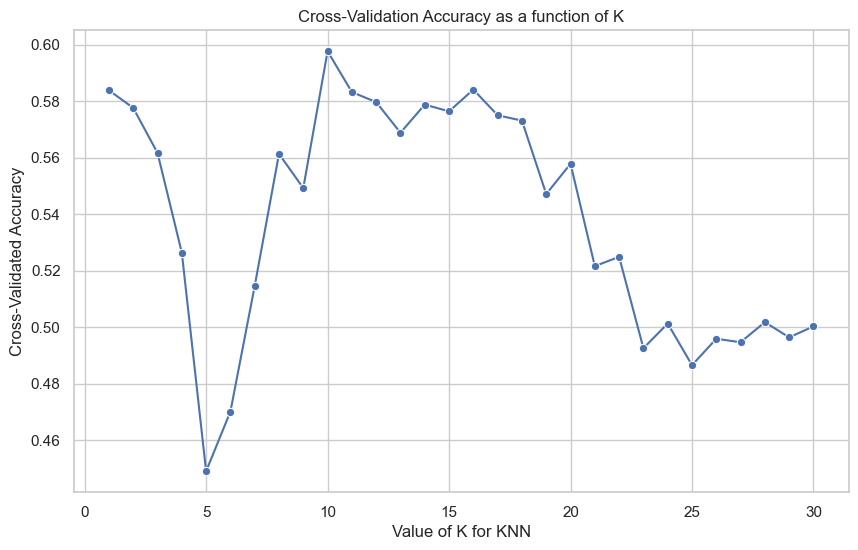

In [62]:
knn_classifier_2.find_best_k(X_2, y_2, range(1, 31))

Cross-Validation

5-fold cross-validation repeated 300 times to obtain average accuracy and ROC AUC

In [63]:
#   Accuracies
accs = []
stds = []

#   ROC AUCs
all_mean_fprs = []
all_mean_tprs = []
all_std_tprs = []
all_aucs = []

for i in range(300):
    acc_params, roc_params = knn_classifier.cross_validate(X, y, 5)
    accs.append(acc_params[0])
    stds.append(acc_params[1])
    
    all_mean_fprs.append(roc_params[0])
    all_mean_tprs.append(roc_params[1])
    all_std_tprs.append(roc_params[2])
    all_aucs.append(roc_params[3])
    
print("Accuracy: {:.4f} ± {:.4f}".format(np.mean(accs), np.mean(stds)))

Accuracy: 0.5320 ± 0.0543


In [64]:
#   Accuracies
accs = []
stds = []

#   ROC AUCs
all_mean_fprs = []
all_mean_tprs = []
all_std_tprs = []
all_aucs = []

for i in range(300):
    acc_params, roc_params = knn_classifier_1.cross_validate(X_1, y_1, 5)
    accs.append(acc_params[0])
    stds.append(acc_params[1])
    
    all_mean_fprs.append(roc_params[0])
    all_mean_tprs.append(roc_params[1])
    all_std_tprs.append(roc_params[2])
    all_aucs.append(roc_params[3])
    
print("Accuracy: {:.4f} ± {:.4f}".format(np.mean(accs), np.mean(stds)))

Accuracy: 0.5359 ± 0.0810


In [65]:
#   Accuracies
accs = []
stds = []

#   ROC AUCs
all_mean_fprs = []
all_mean_tprs = []
all_std_tprs = []
all_aucs = []

for i in range(300):
    acc_params, roc_params = knn_classifier_2.cross_validate(X_2, y_2, 5)
    accs.append(acc_params[0])
    stds.append(acc_params[1])
    
    all_mean_fprs.append(roc_params[0])
    all_mean_tprs.append(roc_params[1])
    all_std_tprs.append(roc_params[2])
    all_aucs.append(roc_params[3])
    
print("Accuracy: {:.4f} ± {:.4f}".format(np.mean(accs), np.mean(stds)))

Accuracy: 0.5979 ± 0.1084


Plot Results

In [ ]:
mean_mean_fpr = np.mean(all_mean_fprs, axis=0)
mean_mean_tpr = np.mean(all_mean_tprs, axis=0)
mean_std_tpr = np.mean(all_std_tprs, axis=0)
mean_auc = np.mean(all_aucs)

plot_avg_roc_curve(mean_mean_fpr, mean_mean_tpr, mean_std_tpr, mean_auc)

Permutation t-test

Checking the p-values of each feature to define the importance of each

In [ ]:
t_statistics, p_values = knn_classifier.permutation_t_test(X, y, 1000)
# p_values = svm_classifier.permutation_importance(X, y, 1000)

In [ ]:
t_stats = {}
p_vals = []

for feat, p_val in p_values:
    lab = labels[int(feat[-3:])]
    # lab = total_labels[int(feat[-3:])]
    # lab = feat
    t_stats[lab] = t_statistics[feat]
    p_vals.append((lab,p_val))

In [ ]:
plt.figure(figsize=(10, 20))
plt.barh([x[0] for x in p_vals], [x[1] for x in p_vals])
plt.ylabel('Features')
plt.xlabel('Average Drop in Accuracy')
plt.title('Feature Importance based on Permutation Test')
plt.tight_layout()
plt.show()

for feature, p_val in p_vals:
    print(f"{feature}\tp-value: {p_val}\tt-statistic: {t_stats[feature]}")
    # print(f"{feature}\tp-value: {p_val:.4f}")
